In [1]:
import sys
import scanpy as sc
import scipy.sparse as sp
import anndata
import pandas as pd
import numpy as np
import os
import gc
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as mpl

In [2]:
adata = sc.read_10x_h5("../Data/square_002um/filtered_feature_bc_matrix.h5")
adata.var_names_make_unique()
adata

/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 4919197 × 18085
    var: 'gene_ids', 'feature_types', 'genome'

In [3]:
adata.obs.head()

""
s_002um_00700_02130-1
s_002um_02058_00301-1
s_002um_02043_00141-1
s_002um_02278_00850-1
s_002um_01729_00511-1


In [4]:
adata.var.head()

,gene_ids,feature_types,genome
SAMD11,ENSG00000187634,Gene Expression,GRCh38
NOC2L,ENSG00000188976,Gene Expression,GRCh38
KLHL17,ENSG00000187961,Gene Expression,GRCh38
PLEKHN1,ENSG00000187583,Gene Expression,GRCh38
PERM1,ENSG00000187642,Gene Expression,GRCh38


In [5]:
if hasattr(adata.X, "toarray"):
    adata.X = adata.X.toarray()

: 

In [5]:
sc.pl.highest_expr_genes(adata, n_top=20)

/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:233: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


AttributeError: 'csr_matrix' object has no attribute 'A'

In [11]:
cell_index = 0  # Index of the cell you want to examine

# Access the expression data for the specific cell
gene_expression = adata.X[cell_index]

# Get the indices of the genes with non-zero expression in the cell
expressed_gene_indices = gene_expression.nonzero()[1]

# Access the gene names from the 'var_names' attribute
expressed_genes = adata.var_names[expressed_gene_indices]

# Print the list of expressed genes in the cell
print(expressed_genes)

Index(['EXOSC10', 'SFN', 'PTPRF', 'BTF3L4', 'TACSTD2', 'LRRC40', 'CLCA2',
       'RSBN1', 'MCL1', 'S100A10',
       ...
       'MIS18A', 'AP1B1', 'TRIOBP', 'DYNLT3', 'FTSJ1', 'RBM3', 'MSN',
       'MT-ATP6', 'MT-CO3', 'MT-ND4L'],
      dtype='object', length=224)


In [10]:
adata.var[adata.var.index.str.startswith('MT-')]

,gene_ids,feature_types,genome
MT-ND1,ENSG00000198888,Gene Expression,GRCh38
MT-ND2,ENSG00000198763,Gene Expression,GRCh38
MT-CO2,ENSG00000198712,Gene Expression,GRCh38
MT-ATP6,ENSG00000198899,Gene Expression,GRCh38
MT-CO3,ENSG00000198938,Gene Expression,GRCh38
MT-ND3,ENSG00000198840,Gene Expression,GRCh38
MT-ND4L,ENSG00000212907,Gene Expression,GRCh38
MT-ND4,ENSG00000198886,Gene Expression,GRCh38
MT-ND5,ENSG00000198786,Gene Expression,GRCh38
MT-ND6,ENSG00000198695,Gene Expression,GRCh38


In [12]:
adata.var["MT"] = adata.var_names.str.startswith("MT-")

In [13]:
adata.var

,gene_ids,feature_types,genome,MT
SAMD11,ENSG00000187634,Gene Expression,GRCh38,False
NOC2L,ENSG00000188976,Gene Expression,GRCh38,False
KLHL17,ENSG00000187961,Gene Expression,GRCh38,False
PLEKHN1,ENSG00000187583,Gene Expression,GRCh38,False
PERM1,ENSG00000187642,Gene Expression,GRCh38,False
...,...,...,...,...
MT-ND4L,ENSG00000212907,Gene Expression,GRCh38,True
MT-ND4,ENSG00000198886,Gene Expression,GRCh38,True
MT-ND5,ENSG00000198786,Gene Expression,GRCh38,True
MT-ND6,ENSG00000198695,Gene Expression,GRCh38,True


In [14]:
sc.pp.calculate_qc_metrics(adata, qc_vars=["MT"], inplace=True)

/Users/siyuanzhao/anaconda3/envs/VDS/lib/python3.10/site-packages/scanpy/preprocessing/_qc.py:431: RuntimeWarning: invalid value encountered in divide
  return values / sums[:, None]


In [15]:
adata

AnnData object with n_obs × n_vars = 310118 × 18085
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT'
    var: 'gene_ids', 'feature_types', 'genome', 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [16]:
number_of_spots = adata.obs_names.shape[0]
mean_reads_per_spot = adata.obs['total_counts'].mean()
median_genes_per_spot = adata.obs['n_genes_by_counts'].median()

print("Number of spots under tissue:", number_of_spots)
print("Mean reads per spot:", mean_reads_per_spot)
print("Median genes per spot:", median_genes_per_spot)

Number of spots under tissue: 310118
Mean reads per spot: 114.51563
Median genes per spot: 37.0


In [17]:
adata.var

,gene_ids,feature_types,genome,MT,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
SAMD11,ENSG00000187634,Gene Expression,GRCh38,False,17,0.000055,0.000055,99.994518,17.0,2.890372
NOC2L,ENSG00000188976,Gene Expression,GRCh38,False,2426,0.008029,0.007997,99.217717,2490.0,7.820439
KLHL17,ENSG00000187961,Gene Expression,GRCh38,False,357,0.001164,0.001163,99.884883,361.0,5.891644
PLEKHN1,ENSG00000187583,Gene Expression,GRCh38,False,2819,0.009496,0.009452,99.090991,2945.0,7.988204
PERM1,ENSG00000187642,Gene Expression,GRCh38,False,8,0.000026,0.000026,99.997420,8.0,2.197225
...,...,...,...,...,...,...,...,...,...,...
MT-ND4L,ENSG00000212907,Gene Expression,GRCh38,True,39919,0.160990,0.149273,87.127803,49926.0,10.818317
MT-ND4,ENSG00000198886,Gene Expression,GRCh38,True,34477,0.135497,0.127070,88.882619,42020.0,10.645925
MT-ND5,ENSG00000198786,Gene Expression,GRCh38,True,8412,0.028625,0.028223,97.287484,8877.0,9.091331
MT-ND6,ENSG00000198695,Gene Expression,GRCh38,True,13407,0.046776,0.045715,95.676807,14506.0,9.582387


In [18]:
adata.obs

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_MT,log1p_total_counts_MT,pct_counts_MT
s_008um_00301_00321-1,224,5.416100,347.0,5.852202,49.855908,64.265130,93.083573,100.0,4.0,1.609438,1.152738
s_008um_00602_00290-1,25,3.258097,30.0,3.433987,100.000000,100.000000,100.000000,100.0,1.0,0.693147,3.333333
s_008um_00515_00112-1,96,4.574711,108.0,4.691348,57.407407,100.000000,100.000000,100.0,2.0,1.098612,1.851852
s_008um_00526_00291-1,103,4.644391,122.0,4.812184,56.557377,97.540984,100.000000,100.0,2.0,1.098612,1.639344
s_008um_00681_00396-1,85,4.454347,89.0,4.499810,60.674157,100.000000,100.000000,100.0,1.0,0.693147,1.123595
...,...,...,...,...,...,...,...,...,...,...,...
s_008um_00653_00166-1,20,3.044522,20.0,3.044523,100.000000,100.000000,100.000000,100.0,1.0,0.693147,5.000000
s_008um_00353_00477-1,119,4.787492,125.0,4.836282,44.800000,84.800000,100.000000,100.0,1.0,0.693147,0.800000
s_008um_00797_00672-1,1,0.693147,1.0,0.693147,100.000000,100.000000,100.000000,100.0,0.0,0.000000,0.000000
s_008um_00565_00244-1,55,4.025352,60.0,4.110874,91.666667,100.000000,100.000000,100.0,0.0,0.000000,0.000000


<Axes: xlabel='n_genes_by_counts', ylabel='Count'>

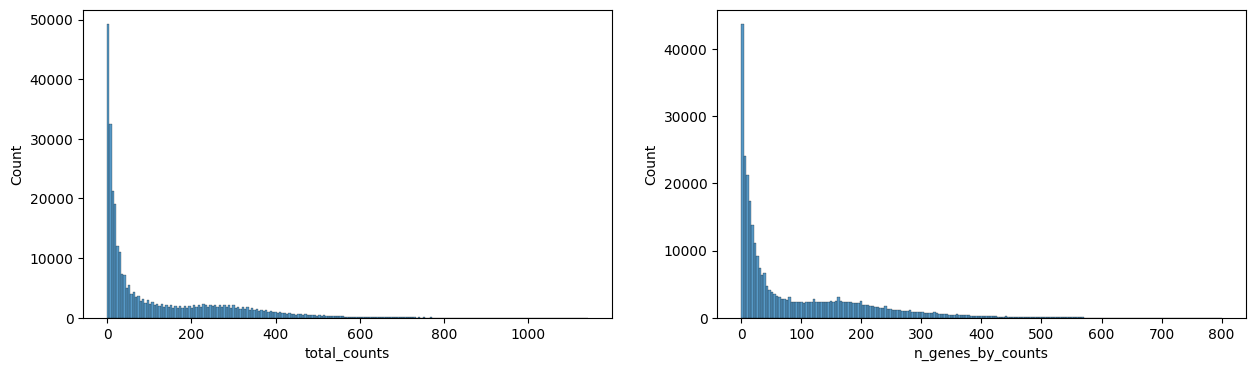

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
sns.histplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.histplot(adata.obs["n_genes_by_counts"], kde=False, ax=axs[1])

In [20]:
adata.obs.sort_values("total_counts")

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_MT,log1p_total_counts_MT,pct_counts_MT
s_008um_00146_00644-1,0,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,0.0,0.000000,NaN
s_008um_00171_00590-1,0,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,0.0,0.000000,NaN
s_008um_00349_00761-1,0,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,0.0,0.000000,NaN
s_008um_00016_00465-1,0,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,0.0,0.000000,NaN
s_008um_00205_00265-1,0,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,0.0,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...
s_008um_00351_00062-1,696,6.546785,1046.0,6.953684,32.791587,42.351816,52.581262,81.261950,16.0,2.833213,1.529637
s_008um_00338_00351-1,800,6.685861,1050.0,6.957498,23.428571,32.952381,42.857143,71.428571,27.0,3.332205,2.571429
s_008um_00351_00058-1,721,6.582025,1079.0,6.984716,32.530120,41.797961,51.714551,79.518072,19.0,2.995732,1.760890
s_008um_00338_00198-1,750,6.621406,1115.0,7.017506,32.376682,41.345291,50.672646,77.578475,9.0,2.302585,0.807175


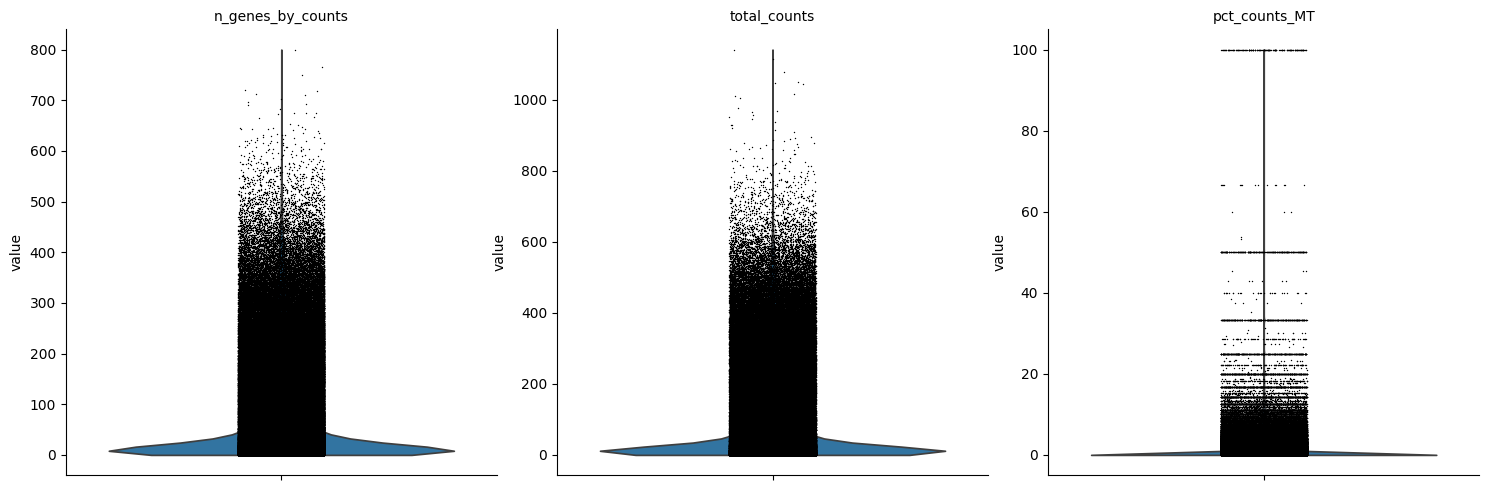

In [23]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_MT'], multi_panel=True)